<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Move-to-the-full-Nicholls-Turton-entrainment-parameterization,-following-Gesso-et-al.-2014" data-toc-modified-id="Move-to-the-full-Nicholls-Turton-entrainment-parameterization,-following-Gesso-et-al.-2014-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Move to the full Nicholls-Turton entrainment parameterization, following Gesso et al. 2014</a></span></li><li><span><a href="#turn-the-last-timestep-values-into-a-named-tuple" data-toc-modified-id="turn-the-last-timestep-values-into-a-named-tuple-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>turn the last timestep values into a named tuple</a></span></li><li><span><a href="#plot-the-$\theta_l$-and-$q_t$--flux-profiles-at-30-levels" data-toc-modified-id="plot-the-$\theta_l$-and-$q_t$--flux-profiles-at-30-levels-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>plot the $\theta_l$ and $q_t$  flux profiles at 30 levels</a></span></li></ul></li><li><span><a href="#Now-turn-this-into-a-buoyancy-flux-profile" data-toc-modified-id="Now-turn-this-into-a-buoyancy-flux-profile-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Now turn this into a buoyancy flux profile</a></span><ul class="toc-item"><li><span><a href="#borrow-calc_lcl-from-interactive_vapor-notebook" data-toc-modified-id="borrow-calc_lcl-from-interactive_vapor-notebook-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>borrow calc_lcl from interactive_vapor notebook</a></span></li><li><span><a href="#calculate-the-saturated-and-unsaturated-thetav-jumps-at-the-inversion" data-toc-modified-id="calculate-the-saturated-and-unsaturated-thetav-jumps-at-the-inversion-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>calculate the saturated and unsaturated thetav jumps at the inversion</a></span></li><li><span><a href="#calculate-the-thetav-inversion-jump-accounting-for-evaporative-cooling" data-toc-modified-id="calculate-the-thetav-inversion-jump-accounting-for-evaporative-cooling-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>calculate the thetav inversion jump accounting for evaporative cooling</a></span></li><li><span><a href="#calculate-the-buoyancy-integral-terms" data-toc-modified-id="calculate-the-buoyancy-integral-terms-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>calculate the buoyancy integral terms</a></span></li><li><span><a href="#Calculate-the-densest-mixture-for-this-inversion-jump" data-toc-modified-id="Calculate-the-densest-mixture-for-this-inversion-jump-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Calculate the densest mixture for this inversion jump</a></span></li><li><span><a href="#Calculate-the-Nicholls-and-Turton-average-evaporative-cooling-effect-$\Delta-m-/-\Delta-\theta_v$" data-toc-modified-id="Calculate-the-Nicholls-and-Turton-average-evaporative-cooling-effect-$\Delta-m-/-\Delta-\theta_v$-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Calculate the Nicholls and Turton average evaporative cooling effect $\Delta m / \Delta \theta_v$</a></span></li><li><span><a href="#Calculate-the-weakened-Nicholls-and-Turton-inversion-buoyancy-jump" data-toc-modified-id="Calculate-the-weakened-Nicholls-and-Turton-inversion-buoyancy-jump-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Calculate the weakened Nicholls and Turton inversion buoyancy jump</a></span></li><li><span><a href="#Calculate-the-final-entrainment-rate-according-to-de-Roode-lecture-2-slide-15" data-toc-modified-id="Calculate-the-final-entrainment-rate-according-to-de-Roode-lecture-2-slide-15-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Calculate the final entrainment rate according to de Roode lecture 2 slide 15</a></span></li></ul></li></ul></div>

### Move to the full Nicholls-Turton entrainment parameterization, following Gesso et al. 2014

Read in the model result for the simple radiative entrainment closure of de Roode lecture 2 and use those
values to calculate the NT entrainment rate

In [1]:
from matplotlib import pyplot as plt
from a500.utils.helper_funs import make_tuple
from a500.thermo import thermfuncs as tf
from a500.thermo import thermconst as tc
import pandas as pd
import numpy as np
import pdb

with open('vapor_profile.csv') as f:
    df_result=pd.read_csv(f)
    
with open('dumpradiative.csv') as f:
    df_result=pd.read_csv(f)
out=df_result.plot('time','h')

print(tf.__file__)

/Users/phil/repos/atsc500/a500/thermo/thermfuncs.py


In [2]:
df_result.tail()

,theta,h,qv,time,deltheta,delqv,LCL,q_flux_0,T_flux_0,thick,entflux_theta,went,entflux_qv,radcool
2155,279.302789,481.432282,0.005376,14.965278,11.585805,-0.003376,206.767554,0.000008,0.006972,274.664728,-0.001394,0.00012,4.062698e-07,35.0
2156,279.302789,481.432258,0.005376,14.972222,11.585805,-0.003376,206.767558,0.000008,0.006972,274.664700,-0.001394,0.00012,4.062698e-07,35.0
2157,279.302789,481.432234,0.005376,14.979167,11.585805,-0.003376,206.767562,0.000008,0.006972,274.664672,-0.001394,0.00012,4.062699e-07,35.0
2158,279.302789,481.432211,0.005376,14.986111,11.585804,-0.003376,206.767566,0.000008,0.006972,274.664645,-0.001394,0.00012,4.062699e-07,35.0
2159,279.302789,481.432188,0.005376,14.993056,11.585804,-0.003376,206.767570,0.000008,0.006972,274.664618,-0.001394,0.00012,4.062699e-07,35.0


### turn the last timestep values into a named tuple

In [3]:
out=df_result.iloc[-1]  #final timestep in dataframe
print(out)
steady_state=make_tuple(out.to_dict())

theta            2.793028e+02
h                4.814322e+02
qv               5.375565e-03
time             1.499306e+01
deltheta         1.158580e+01
delqv           -3.375565e-03
LCL              2.067676e+02
q_flux_0         8.125389e-06
T_flux_0         6.972112e-03
thick            2.746646e+02
entflux_theta   -1.394422e-03
went             1.203561e-04
entflux_qv       4.062699e-07
radcool          3.500000e+01
Name: 2159, dtype: float64


### plot the $\theta_l$ and $q_t$  flux profiles at 30 levels

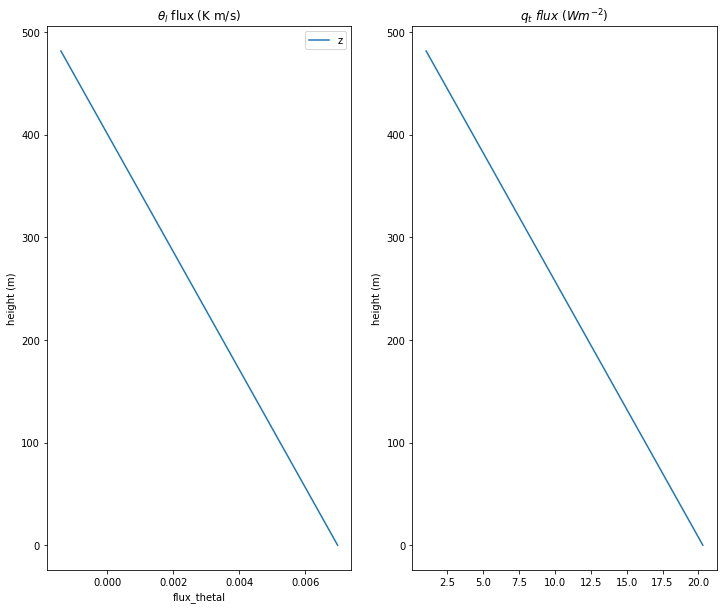

In [4]:
def flux_prof(z,coeffs):
    Fout=coeffs.Fsfc + (coeffs.Finv - coeffs.Fsfc)*(z/coeffs.zinv)
    return Fout

zvals=np.linspace(0,steady_state.h,30)
coeffs_thetal=make_tuple(dict(Fsfc=steady_state.T_flux_0,Finv=steady_state.entflux_theta,
                       zinv=steady_state.h))
coeffs_qt=make_tuple(dict(Fsfc=steady_state.q_flux_0,Finv=steady_state.entflux_qv,
                       zinv=steady_state.h))
flux_thetal=flux_prof(zvals,coeffs_thetal)
flux_qt=flux_prof(zvals,coeffs_qt)
df_flux=pd.DataFrame.from_records(zip(zvals,flux_thetal,flux_qt),columns=['z','flux_thetal','flux_qt'])


fig,(ax0,ax1) = plt.subplots(1,2,figsize=(12,10))
df_flux.plot('flux_thetal','z',ax=ax0)
out=ax1.plot(flux_qt*2.5e6,zvals)

out=ax0.set(title=r'$\theta_l$ flux (K m/s)',ylabel='height (m)')
ax1.set(title=r'$q_t\ flux\ (W m^{-2})$',ylabel='height (m)');



## Now turn this into a buoyancy flux profile

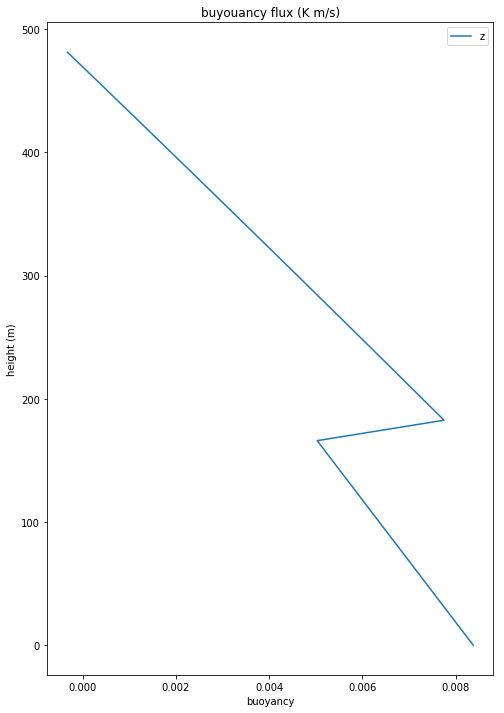

In [5]:
from a500.thermo.thermfuncs import find_press, calc_ABcoeffs
press_vec = find_press(zvals)
#
# find A and B coefficients at each level
# note that qv = qt and theta=thetal in interactive_vapor.ipynb
#

A_list=[]
B_list=[]
for press0 in press_vec:
    A, B, issat=calc_ABcoeffs(steady_state.theta,steady_state.qv,press0)
    A_list.append(A)
    B_list.append(B)    
    
A=np.array(A_list)
B=np.array(B_list)

    
buoyancy_flux = A*flux_thetal + B*flux_qt
df_flux['buoyancy'] = buoyancy_flux

fig, ax0 = plt.subplots(1,1,figsize=(8,12))
df_flux.plot('buoyancy','z',ax=ax0)
out=ax0.set(title=r'buyouancy flux (K m/s)',ylabel='height (m)')

### borrow calc_lcl from interactive_vapor notebook

In [6]:
def calc_lcl(row,psfc):
    """
      find the lcl (in m) for a row in the dataframe
    """
    Tdew = tf.tmr(row['qv'],psfc)
    LCL = tf.LCL(Tdew,row['theta'],psfc)  #kPa
    #
    # rough approximation:  10 kPa = 1 km
    #
    delp=psfc - LCL
    lcl_z= delp*100.
    #pdb.set_trace()
    return lcl_z, LCL

lcl_z, lcl_p = calc_lcl(df_result.iloc[-1],100.)
lcl_z, lcl_p

(206.76757023236547, 97.93232429767635)

### calculate the saturated and unsaturated thetav jumps at the inversion

(unnumbered del Gesso equations below equation 14)

In [7]:
dth=steady_state.deltheta
dqt=steady_state.delqv
thetal_m=steady_state.theta
qt_m=steady_state.qv
h=steady_state.h
press=tf.find_press(steady_state.h)   #kPa
thetal_ft = steady_state.theta + dth
qt_ft = steady_state.qv + dqt

Ad,Bd,issat = tf.calc_ABcoeffs(thetal_ft,qt_ft,press)
Aw,Bw,issat = tf.calc_ABcoeffs(thetal_m,qt_m,press)
invert= tf.t_uos_thetal(thetal_m,qt_m,press)
T_0 = invert.temp
lv=tf.L_t(invert.temp)
Cl =  (Ad*lv/tc.CPD - T_0/tc.EPS)
del_thv_dry = Ad * dth + Bd * dqt
del_thv_sat = Aw * dth + Bw * dqt
print('del_thv_dry',del_thv_dry)
print('del_thv_sat',del_thv_sat)

del_thv_dry 11.003090778373952
del_thv_sat 2.7415089308730565


In [8]:
Aw, Bw

(0.5588383758459707, 1105.9135748473473)

###  calculate the thetav inversion jump accounting for evaporative cooling

(see Stevens 2002 equations 16-18)

In [9]:
ql_max = invert.ql
print('ql_max at cloud top (kg/kg)',ql_max)
Cl =  (Ad*lv/tc.CPD - T_0/tc.EPS)
Del_thv = del_thv_dry - Cl * ql_max
print('Del_thv',Del_thv)

ql_max at cloud top (kg/kg) 0.00022777567096362965
Del_thv 10.53824044025201


### calculate the buoyancy integral terms

Gesso equations 13-14

In [10]:
zi = steady_state.h
lcl_press=tf.LCL_thetal(thetal_m,qt_m)
zb=tf.find_height(lcl_press)

T1 = zb/zi
T2 = 0.5 * zb**2 / zi**2
T3 = (zi-zb)/zi
T4 = 0.5 * (zi**2 - zb**2) / zi**2

wtl_0=steady_state.T_flux_0
wqt_0=steady_state.q_flux_0
Del_F = steady_state.radcool/tc.CPD

term1 = wtl_0 * (Ad * (T1-T2) + Aw * (T3-T4))
term2 = wqt_0 * (Bd * (T1-T2) + Bw * (T3-T4))
term3 = Del_F * (Ad * T2      + Aw * T4)

Theta_NE = term1 + term2 + term3
print('Gesso Θne',Theta_NE)
print(zb)

Gesso Θne 0.015824860046763846
167.14811408607326


Find wstar using Gesso equations 8 and 12

In [11]:
wstar=(2.5*9.8/T_0*zi*Theta_NE)**(1/3.)
print('wstar without entrainment: {:5.3f} (m/s)'.format(wstar))

wstar without entrainment: 0.877 (m/s)


### Calculate the densest mixture for this inversion jump

Stevens equation 20

In [12]:
chi_star = Cl * ql_max / (del_thv_dry - del_thv_sat)
print('just saturated at with {:5.2f}% environmental air'.format(chi_star*100.))

just saturated at with  5.63% environmental air


### Calculate the Nicholls and Turton average evaporative cooling effect $\Delta m / \Delta \theta_v$

Stevens eq. 30 and de Roode lecture 2  slide 12 -- note that $\Delta m/\Delta \theta_v = 1$ for no evaporation

In [13]:
Del_m = del_thv_dry + chi_star * (2. - chi_star) * (del_thv_sat - del_thv_dry)
print('Δm/Δθv = {:5.2f}'.format(Del_m/Del_thv))

Δm/Δθv =  0.96


### Calculate the weakened Nicholls and Turton inversion buoyancy jump

de Roode lecture 2 slide 15 and Stevens eqn 29 with a2=15 following Bretherton

In [14]:
a2=15.
Del_thv_NT = Del_thv / (1. + a2 * (1. - Del_m/Del_thv))
print('original Del_thv={:5.2f} (K), Del_thv_NT = {:5.2f} (K)'.format(Del_thv,Del_thv_NT))

original Del_thv=10.54 (K), Del_thv_NT =  6.49 (K)


### Calculate the final entrainment rate according to de Roode lecture 2 slide 15

In [15]:
A_NT = 0.2
fac_NT = 2.5

term4 = Del_thv_NT
term5 = A_NT * fac_NT * (T2 * del_thv_dry + T4 * del_thv_sat)
denominator = term4 + term5

we = A_NT * fac_NT * Theta_NE / denominator
print('radiative we is {:5.3f} cm/s and NT we is {:5.3f} cm/s'.format(steady_state.went*100.,we*100.))

radiative we is 0.012 cm/s and NT we is 0.107 cm/s
